# Neural Networks Project  using the SVHN dataset

# The Problem Description: 
Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street level photographs is Google’s Street View imagery comprised of hundreds of millions of geo-located 360 degree panoramic images. The ability to automatically transcribe an address number from a geolocated patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. 
 
More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, secularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. 
 
In this project we will use dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors. 

# Data Description:  
The Street View House Numbers (SVHN) Dataset 
SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images. 
## Link to the dataset: 
https://drive.google.com/file/d/1L2-WXzguhUsCArrFUc8EEkXcj33pahoS/view?usp=sharing 
## Acknowledgement for the datasets. 
Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF  http://ufldl.stanford.edu/housenumbers as the URL for this site when necessary 


## Objective: 
The objective of the project is to learn how to implement a simple image classification pipeline based on a deep neural network. The goals of this project are as follows:  
 
1. Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages) 
2. Data fetching and understand the train/val/test splits.
3. Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations)
4. Implement batch normalization for training the neural network
6. Print the classification accuracy metrics

## Loading the Libraries

In [0]:
from __future__ import absolute_import
from __future__ import print_function
import os
import time
from datetime import timedelta
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import pandas.util.testing as tm

In [0]:
from google.colab import drive
drive.mount('/content/drive')

### Loading the dataset and understanding the  basic Image Classification pipeline and the data-driven approach (train/predict stages)

In [0]:
# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/Colab Notebooks/SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

# Close this file
h5f.close()

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)


### Data fetching and understand the train/val/test splits.

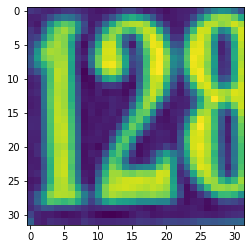

Label:  2


In [0]:
plt.imshow(X_train[0])    # show first number in the training dataset
plt.show()
print('Label: ', y_train[0])

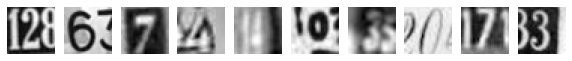

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

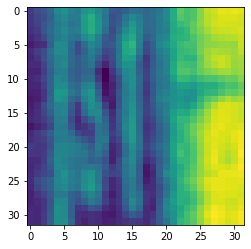

Label:  1


In [0]:
plt.imshow(X_test[0])    # show first number in the test dataset
plt.show()
print('Label: ', y_test[0])

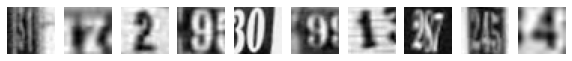

label for each of the above image: [1 7 2 9 0 9 1 8 4 4]


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_test[0:10]))

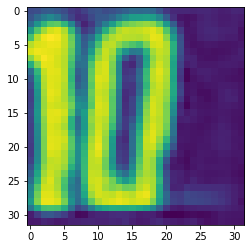

Label:  0


In [0]:
plt.imshow(X_val[0])    # show first number in the training dataset
plt.show()
print('Label: ', y_val[0])

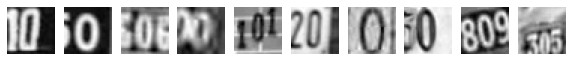

label for each of the above image: [0 0 0 0 0 0 0 0 0 0]


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_val[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_val[0:10]))

### Data PreProcessing

In [0]:
# Reshaping the data
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [0]:
# converting y data into categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42000, 1024) (18000, 1024) (42000, 10) (18000, 10)


# Buiding the CNN Model
Implementing and applying a deep neural network classifier including (feedforward neural network, RELU, activations)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers

In [0]:
model = Sequential()

In [0]:
  model.add(Dense(50, input_shape = (1024, )))
  model.add(Activation('sigmoid'))
  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dense(10))
  model.add(Activation('softmax'))

In [0]:
sigd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sigd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3327 - accuracy: 0.1009
Epoch 2/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3028 - accuracy: 0.0990
Epoch 3/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3027 - accuracy: 0.1019
Epoch 4/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3027 - accuracy: 0.0987
Epoch 5/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3027 - accuracy: 0.0998
Epoch 6/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3027 - accuracy: 0.1013
Epoch 7/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1029
Epoch 8/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1023
Epoch 9/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1019
Epoch 10/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3026 - accura

In [0]:
results = model.evaluate(X_test, y_test)

563/563 [==============================] - 2s 3ms/step - loss: 2.3003 - accuracy: 0.1184


In [0]:
print('Test accuracy: ', results[1])

Test accuracy:  0.11844444274902344


In [0]:
model_history = model.fit(X_train, y_train, batch_size=200, epochs=10, validation_split = 0.1)

Epoch 1/10
189/189 [==============================] - 1s 5ms/step - loss: 2.3002 - accuracy: 0.1173 - val_loss: 2.3002 - val_accuracy: 0.1157
Epoch 2/10
189/189 [==============================] - 1s 4ms/step - loss: 2.3001 - accuracy: 0.1187 - val_loss: 2.3002 - val_accuracy: 0.1195
Epoch 3/10
189/189 [==============================] - 1s 4ms/step - loss: 2.3001 - accuracy: 0.1133 - val_loss: 2.3000 - val_accuracy: 0.0979
Epoch 4/10
189/189 [==============================] - 1s 4ms/step - loss: 2.3000 - accuracy: 0.1079 - val_loss: 2.2999 - val_accuracy: 0.1174
Epoch 5/10
189/189 [==============================] - 1s 4ms/step - loss: 2.3000 - accuracy: 0.1222 - val_loss: 2.3002 - val_accuracy: 0.1121
Epoch 6/10
189/189 [==============================] - 1s 4ms/step - loss: 2.2999 - accuracy: 0.1176 - val_loss: 2.3001 - val_accuracy: 0.1181
Epoch 7/10
189/189 [==============================] - 1s 4ms/step - loss: 2.2998 - accuracy: 0.1228 - val_loss: 2.2999 - val_accuracy: 0.1026
Epoch 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


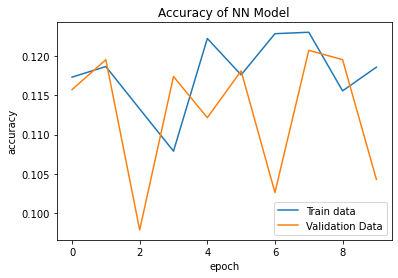

In [0]:
#Here we plot the performance of the model on the training and validation data.
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history['val_accuracy'])
plt.title('Accuracy of NN Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train data', 'Validation Data'], loc='bottom right')
plt.show()

## Weight Initialization

In [0]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    sigd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sigd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [0]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size=200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 1s 4ms/step - loss: 2.5090 - accuracy: 0.0992
Epoch 2/100
210/210 [==============================] - 1s 4ms/step - loss: 2.4286 - accuracy: 0.0992
Epoch 3/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3834 - accuracy: 0.0992
Epoch 4/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3553 - accuracy: 0.0992
Epoch 5/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3366 - accuracy: 0.0992
Epoch 6/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3239 - accuracy: 0.0993
Epoch 7/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3156 - accuracy: 0.0999
Epoch 8/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3102 - accuracy: 0.1005
Epoch 9/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3068 - accuracy: 0.1005
Epoch 10/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3047 - accura

In [0]:
results = model.evaluate(X_test, y_test)

563/563 [==============================] - 2s 3ms/step - loss: 2.3014 - accuracy: 0.1074


In [0]:
print('Test accuracy: ', results[1])

Test accuracy:  0.10744444280862808


In [0]:
model_history = model.fit(X_train, y_train, batch_size=200, epochs=10, validation_split = 0.1)

Epoch 1/10
189/189 [==============================] - 1s 5ms/step - loss: 2.3011 - accuracy: 0.1140 - val_loss: 2.3013 - val_accuracy: 0.1090
Epoch 2/10
189/189 [==============================] - 1s 4ms/step - loss: 2.3011 - accuracy: 0.1141 - val_loss: 2.3014 - val_accuracy: 0.1071
Epoch 3/10
189/189 [==============================] - 1s 4ms/step - loss: 2.3011 - accuracy: 0.1137 - val_loss: 2.3014 - val_accuracy: 0.1081
Epoch 4/10
189/189 [==============================] - 1s 4ms/step - loss: 2.3011 - accuracy: 0.1111 - val_loss: 2.3014 - val_accuracy: 0.1069
Epoch 5/10
189/189 [==============================] - 1s 4ms/step - loss: 2.3011 - accuracy: 0.1116 - val_loss: 2.3014 - val_accuracy: 0.1069
Epoch 6/10
189/189 [==============================] - 1s 4ms/step - loss: 2.3011 - accuracy: 0.1111 - val_loss: 2.3014 - val_accuracy: 0.1088
Epoch 7/10
189/189 [==============================] - 1s 4ms/step - loss: 2.3011 - accuracy: 0.1096 - val_loss: 2.3015 - val_accuracy: 0.1057
Epoch 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


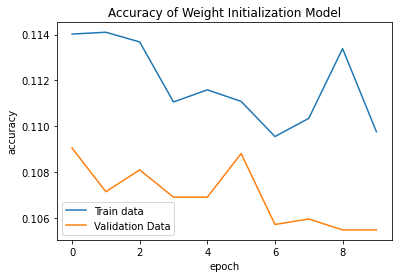

In [0]:
#Here we plot the performance of the model on the training and validation data.
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history['val_accuracy'])
plt.title('Accuracy of Weight Initialization Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train data', 'Validation Data'], loc='bottom right')
plt.show()

## Non Linearity (Activation Function)

In [0]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, )))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sigd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sigd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [0]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 10, verbose = 1)

Epoch 1/10
1313/1313 [==============================] - 5s 4ms/step - loss: 2.9811 - accuracy: 0.0999
Epoch 2/10
1313/1313 [==============================] - 5s 4ms/step - loss: 2.2998 - accuracy: 0.1057
Epoch 3/10
1313/1313 [==============================] - 5s 4ms/step - loss: 2.2732 - accuracy: 0.1237
Epoch 4/10
1313/1313 [==============================] - 5s 4ms/step - loss: 2.2550 - accuracy: 0.1300
Epoch 5/10
1313/1313 [==============================] - 5s 4ms/step - loss: 2.2466 - accuracy: 0.1289
Epoch 6/10
1313/1313 [==============================] - 5s 4ms/step - loss: 2.2418 - accuracy: 0.1329
Epoch 7/10
1313/1313 [==============================] - 5s 4ms/step - loss: 2.2379 - accuracy: 0.1334
Epoch 8/10
1313/1313 [==============================] - 5s 4ms/step - loss: 2.2358 - accuracy: 0.1338
Epoch 9/10
1313/1313 [==============================] - 5s 4ms/step - loss: 2.2339 - accuracy: 0.1344
Epoch 10/10
1313/1313 [==============================] - 5s 4ms/step - loss: 2.232

In [0]:
results = model.evaluate(X_test, y_test)

563/563 [==============================] - 2s 3ms/step - loss: 2.2324 - accuracy: 0.1297


In [0]:
print('Test accuracy: ', results[1])

Test accuracy:  0.12966667115688324


In [0]:
model_history = model.fit(X_train, y_train, batch_size=200, epochs=10, validation_split = 0.1)

Epoch 1/10
189/189 [==============================] - 1s 5ms/step - loss: 2.2293 - accuracy: 0.1351 - val_loss: 2.2293 - val_accuracy: 0.1317
Epoch 2/10
189/189 [==============================] - 1s 5ms/step - loss: 2.2289 - accuracy: 0.1359 - val_loss: 2.2302 - val_accuracy: 0.1314
Epoch 3/10
189/189 [==============================] - 1s 5ms/step - loss: 2.2289 - accuracy: 0.1365 - val_loss: 2.2293 - val_accuracy: 0.1324
Epoch 4/10
189/189 [==============================] - 1s 5ms/step - loss: 2.2288 - accuracy: 0.1359 - val_loss: 2.2296 - val_accuracy: 0.1326
Epoch 5/10
189/189 [==============================] - 1s 5ms/step - loss: 2.2287 - accuracy: 0.1363 - val_loss: 2.2302 - val_accuracy: 0.1312
Epoch 6/10
189/189 [==============================] - 1s 5ms/step - loss: 2.2284 - accuracy: 0.1364 - val_loss: 2.2294 - val_accuracy: 0.1319
Epoch 7/10
189/189 [==============================] - 1s 5ms/step - loss: 2.2283 - accuracy: 0.1359 - val_loss: 2.2300 - val_accuracy: 0.1310
Epoch 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


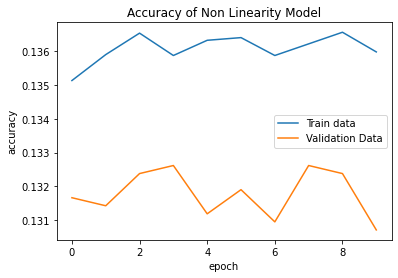

In [0]:
#Here we plot the performance of the model on the training and validation data.
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history['val_accuracy'])
plt.title('Accuracy of Non Linearity Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train data', 'Validation Data'], loc='bottom right')
plt.show()

## Batch Normalization

In [0]:
from tensorflow.keras.layers import BatchNormalization, Dropout

In [0]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, )))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sigd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sigd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [0]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 20, verbose = 1)

Epoch 1/20
1313/1313 [==============================] - 9s 7ms/step - loss: 2.3515 - accuracy: 0.1505
Epoch 2/20
1313/1313 [==============================] - 9s 7ms/step - loss: 2.0918 - accuracy: 0.2606
Epoch 3/20
1313/1313 [==============================] - 9s 7ms/step - loss: 1.8900 - accuracy: 0.3575
Epoch 4/20
1313/1313 [==============================] - 9s 7ms/step - loss: 1.7357 - accuracy: 0.4275
Epoch 5/20
1313/1313 [==============================] - 9s 7ms/step - loss: 1.6116 - accuracy: 0.4764
Epoch 6/20
1313/1313 [==============================] - 9s 7ms/step - loss: 1.5162 - accuracy: 0.5154
Epoch 7/20
1313/1313 [==============================] - 9s 7ms/step - loss: 1.4372 - accuracy: 0.5446
Epoch 8/20
1313/1313 [==============================] - 9s 7ms/step - loss: 1.3679 - accuracy: 0.5696
Epoch 9/20
1313/1313 [==============================] - 9s 7ms/step - loss: 1.3218 - accuracy: 0.5834
Epoch 10/20
1313/1313 [==============================] - 9s 7ms/step - loss: 1.270

In [0]:
results = model.evaluate(X_test, y_test)

563/563 [==============================] - 2s 4ms/step - loss: 0.9948 - accuracy: 0.6884


In [0]:
print('Test accuracy: ', results[1])

Test accuracy:  0.6884444355964661


In [0]:
model_history = model.fit(X_train, y_train, batch_size=200, epochs=20, validation_split = 0.1)

Epoch 1/20
189/189 [==============================] - 1s 7ms/step - loss: 0.9180 - accuracy: 0.7144 - val_loss: 0.6928 - val_accuracy: 0.7924
Epoch 2/20
189/189 [==============================] - 1s 7ms/step - loss: 0.9145 - accuracy: 0.7172 - val_loss: 0.6753 - val_accuracy: 0.7943
Epoch 3/20
189/189 [==============================] - 1s 7ms/step - loss: 0.9161 - accuracy: 0.7151 - val_loss: 0.7007 - val_accuracy: 0.7838
Epoch 4/20
189/189 [==============================] - 1s 7ms/step - loss: 0.9077 - accuracy: 0.7184 - val_loss: 0.7175 - val_accuracy: 0.7779
Epoch 5/20
189/189 [==============================] - 1s 7ms/step - loss: 0.9030 - accuracy: 0.7188 - val_loss: 0.7379 - val_accuracy: 0.7731
Epoch 6/20
189/189 [==============================] - 1s 7ms/step - loss: 0.9046 - accuracy: 0.7204 - val_loss: 0.7109 - val_accuracy: 0.7812
Epoch 7/20
189/189 [==============================] - 1s 7ms/step - loss: 0.9002 - accuracy: 0.7219 - val_loss: 0.6819 - val_accuracy: 0.7912
Epoch 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


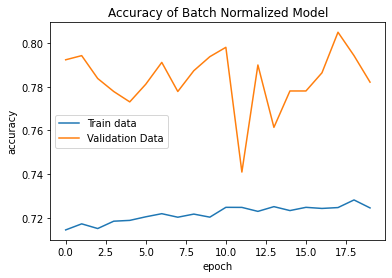

In [0]:
#Here we plot the performance of the model on the training and validation data.
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history['val_accuracy'])
plt.title('Accuracy of Batch Normalized Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train data', 'Validation Data'], loc='bottom right')
plt.show()

## Dropout

In [0]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [0]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 20, verbose = 1)

Epoch 1/20
1313/1313 [==============================] - 10s 8ms/step - loss: 2.1648 - accuracy: 0.2103
Epoch 2/20
1313/1313 [==============================] - 10s 7ms/step - loss: 1.7735 - accuracy: 0.3710
Epoch 3/20
1313/1313 [==============================] - 10s 7ms/step - loss: 1.6015 - accuracy: 0.4493
Epoch 4/20
1313/1313 [==============================] - 10s 7ms/step - loss: 1.5138 - accuracy: 0.4935
Epoch 5/20
1313/1313 [==============================] - 10s 8ms/step - loss: 1.4436 - accuracy: 0.5249
Epoch 6/20
1313/1313 [==============================] - 10s 7ms/step - loss: 1.3992 - accuracy: 0.5450
Epoch 7/20
1313/1313 [==============================] - 10s 7ms/step - loss: 1.3715 - accuracy: 0.5537
Epoch 8/20
1313/1313 [==============================] - 10s 7ms/step - loss: 1.3379 - accuracy: 0.5680
Epoch 9/20
1313/1313 [==============================] - 10s 7ms/step - loss: 1.3000 - accuracy: 0.5832
Epoch 10/20
1313/1313 [==============================] - 10s 7ms/step - l

In [0]:
results = model.evaluate(X_test, y_test)

563/563 [==============================] - 2s 4ms/step - loss: 0.8462 - accuracy: 0.7476


In [0]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7476111054420471


In [0]:
model_history = model.fit(X_train, y_train, batch_size=200, epochs=20, validation_split = 0.1)

Epoch 1/20
189/189 [==============================] - 1s 8ms/step - loss: 0.9824 - accuracy: 0.6978 - val_loss: 0.6951 - val_accuracy: 0.7912
Epoch 2/20
189/189 [==============================] - 1s 7ms/step - loss: 0.9568 - accuracy: 0.7059 - val_loss: 0.6803 - val_accuracy: 0.7914
Epoch 3/20
189/189 [==============================] - 1s 7ms/step - loss: 0.9549 - accuracy: 0.7072 - val_loss: 0.6833 - val_accuracy: 0.7910
Epoch 4/20
189/189 [==============================] - 1s 7ms/step - loss: 0.9458 - accuracy: 0.7072 - val_loss: 0.6669 - val_accuracy: 0.7979
Epoch 5/20
189/189 [==============================] - 1s 7ms/step - loss: 0.9360 - accuracy: 0.7109 - val_loss: 0.7277 - val_accuracy: 0.7755
Epoch 6/20
189/189 [==============================] - 1s 7ms/step - loss: 0.9413 - accuracy: 0.7106 - val_loss: 0.6781 - val_accuracy: 0.7948
Epoch 7/20
189/189 [==============================] - 1s 7ms/step - loss: 0.9343 - accuracy: 0.7135 - val_loss: 0.6759 - val_accuracy: 0.7881
Epoch 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


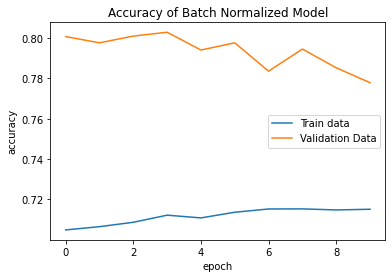

In [0]:
#Here we plot the performance of the model on the training and validation data.
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history['val_accuracy'])
plt.title('Accuracy of Batch Normalized Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train data', 'Validation Data'], loc='bottom right')
plt.show()

## Conclusion
We built a neural network model using the network classifiers - Feed Forwrad, ReLU and Sigmoid activations. We trained the model using batch normalization and achieved an accuracy of 68.8% on test data, 72.2% on training data and 78.2% on validation data using 20 epochs. We dropped the weights and acieved an model accuracy of 74.76% on test data, 71% on training data and 78% on validation data using 20 epochs.